# Task 2: Linear and Multivariable Regression

Members: Lars Olav Thorbjørnsen, Stein Are Årsnes og Sanjai Vijayaratnam

### Abstract

### Introduction

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score  
df = pd.read_excel('ProjectData2024.xlsx')



#### Linear Regression
#### Vs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vs      1024 non-null   float64
 1   DEN     1024 non-null   float64
 2   NEU     1024 non-null   float64
 3   Vp      1024 non-null   float64
dtypes: float64(4)
memory usage: 32.1 KB
[1.6821362] 0.38667161251488036
Mean Squared Error: 0.03298301121644875
Root Mean Squared Error: 0.18161225513838197
R-Square: 0.6964251039313529


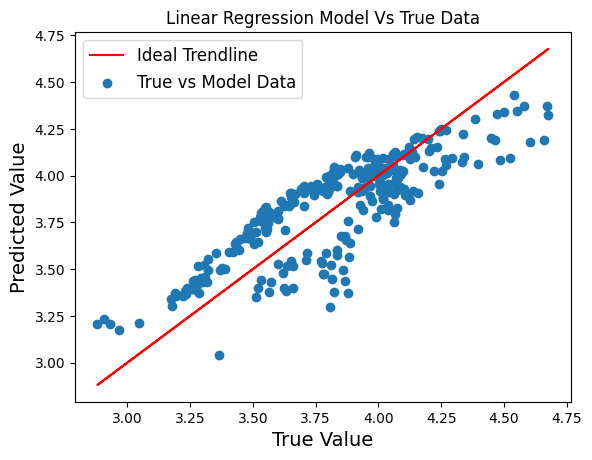

My_Model R2= 0.694783512375615
r_adjusted = 0.6934292990359386


In [17]:
df4 = pd.read_excel('CleanOutlier1.xlsx')

df4.info()
X = df4[['Vs']]

y = df4['Vp']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)
print(regression.coef_, regression.intercept_)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )
plt.plot(y_test,y_test, '-r')
plt.scatter(y_test, y_pred)

plt.title('Linear Regression Model Vs True Data')
plt.xlabel('True Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.legend(['Ideal Trendline', 'True vs Model Data'], loc='upper left', fontsize=12)
plt.show()

Co_true = np.array(0.77*y_test**2.93)
Co_my_model = 0.77*y_pred**2.93
Co_Castagna = np.array(0.77*(1.16*x_test + 1.36)**2.93)
print('My_Model R2=', r2_score(Co_true, Co_my_model))

def r2_adj(n, p):
    return 1-(1-r2)*(n-1)/(n-p-1)

n = len(y_pred)
p = 3
print('r_adjusted =', r2_adj(n,p))  

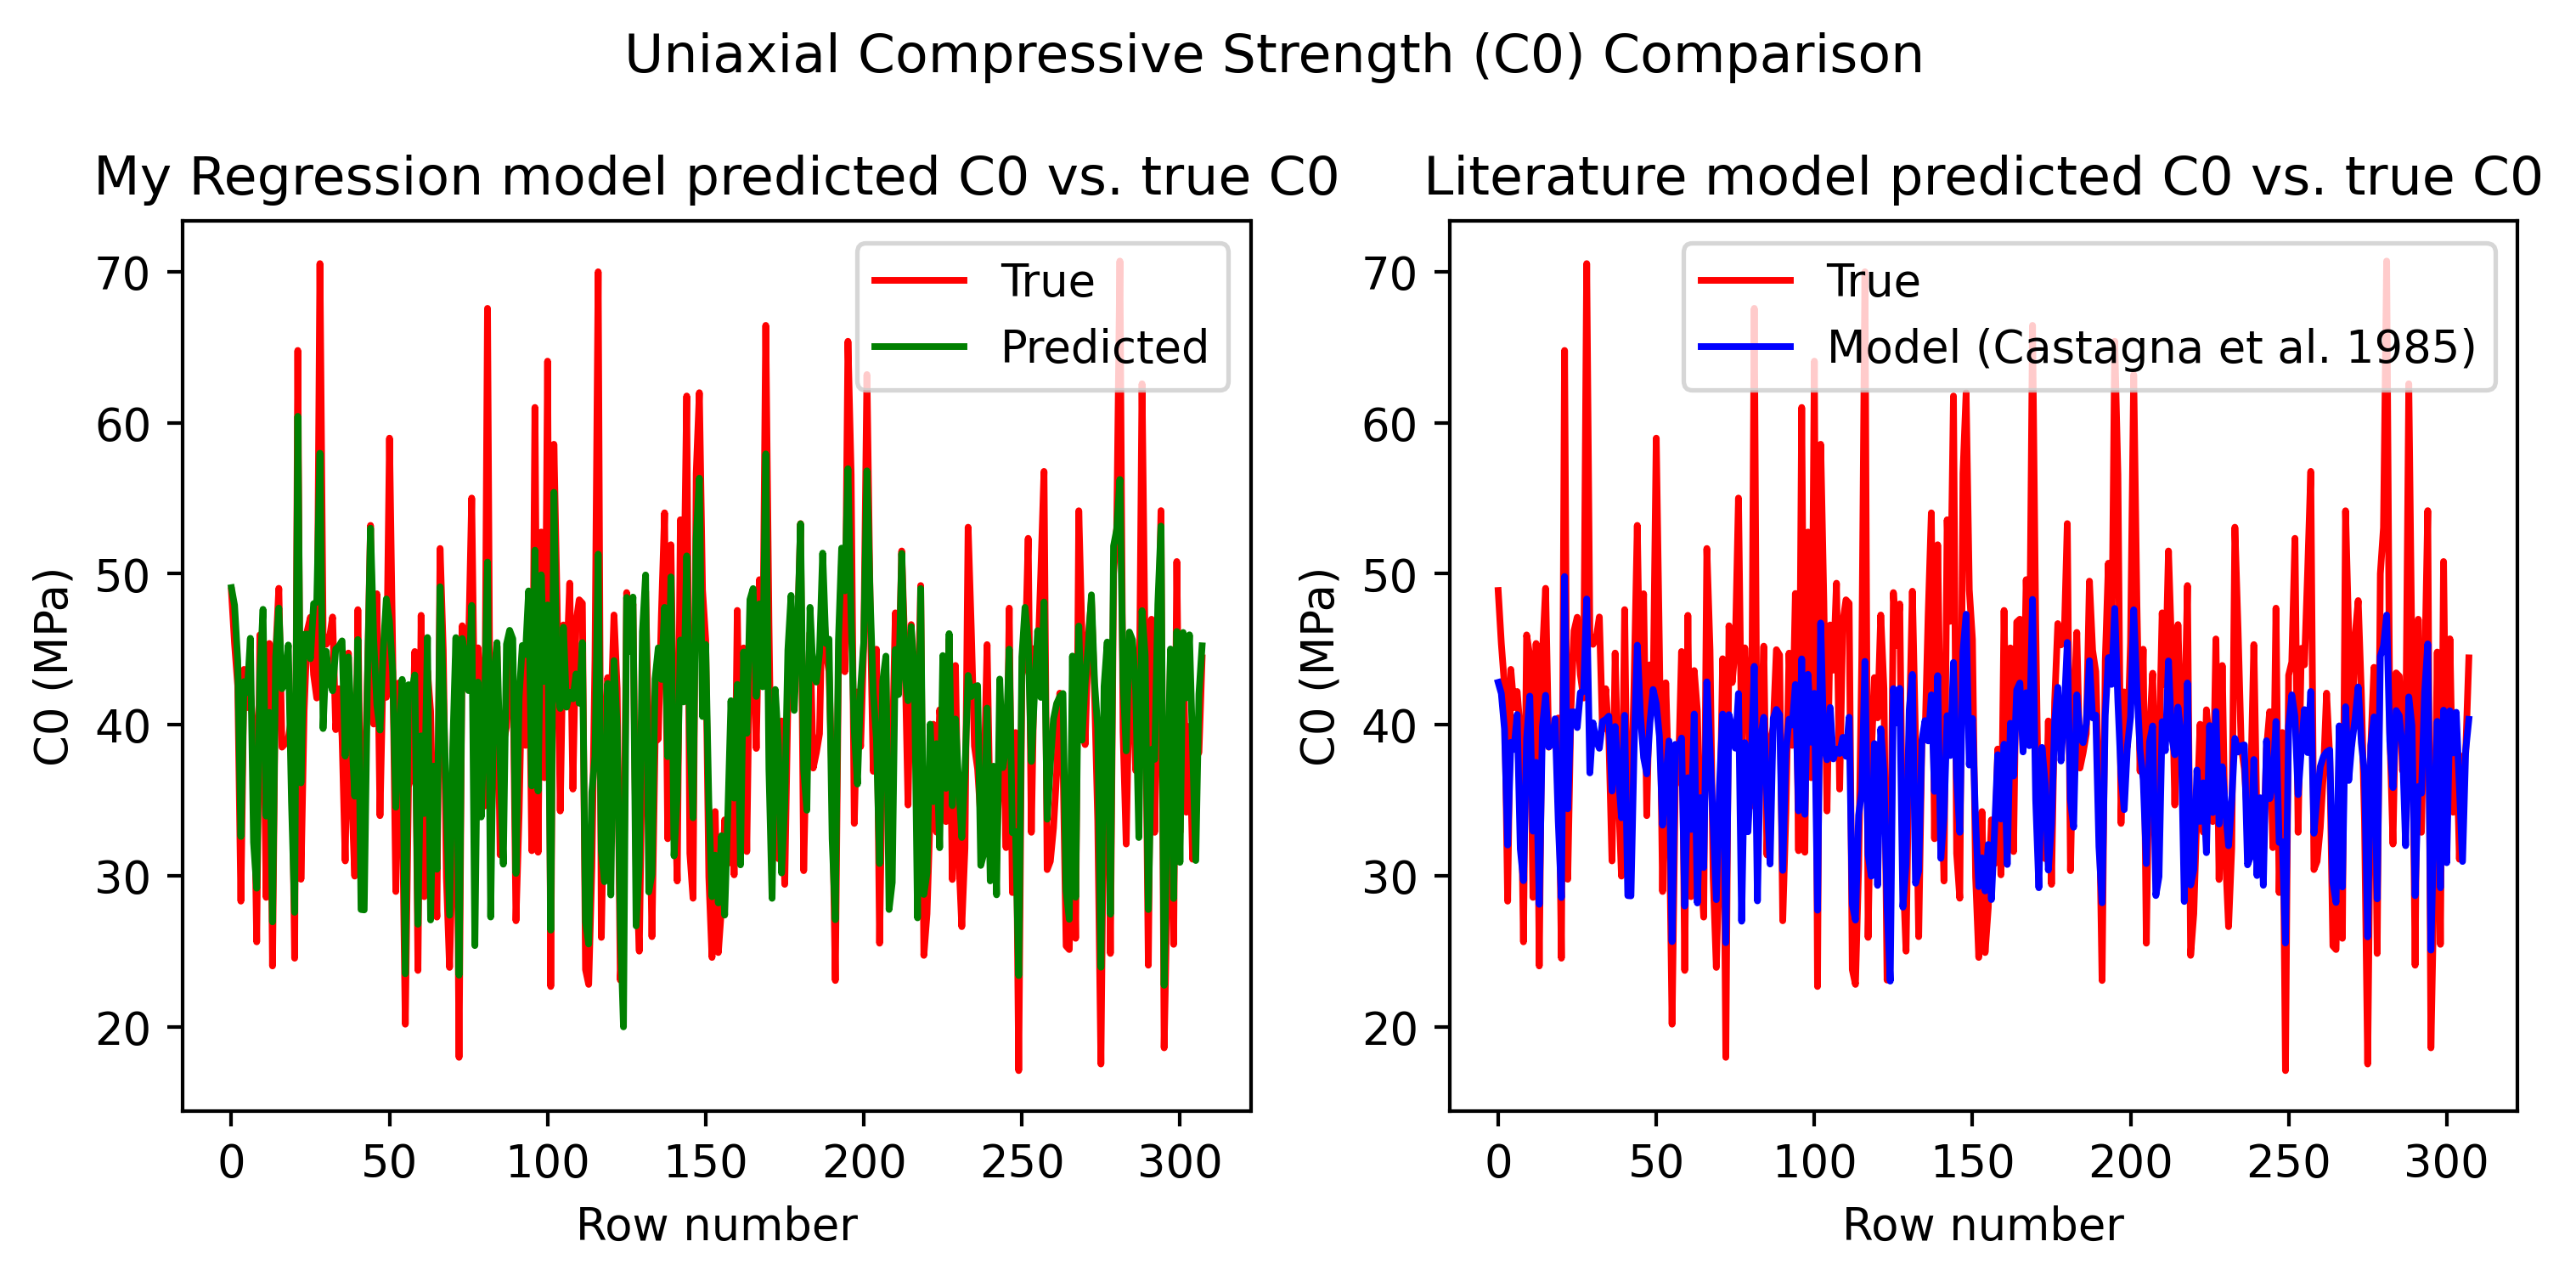

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8,4), dpi = 380)

fig.suptitle("Uniaxial Compressive Strength (C0) Comparison")
# Plotting regression model predicted C0 and true C0
axes[0].plot(Co_true, label = "True", color = "red")
axes[0].plot(Co_my_model, label = "Predicted", color = "green")
axes[0].set_xlabel("Row number")
axes[0].set_ylabel("C0 (MPa)")
axes[0].set_title("My Regression model predicted C0 vs. true C0")
axes[0].legend()


# Plotting literature model (Castagna et al. (1985)) predicted C0 and true C0
axes[1].plot(Co_true, label = "True", color = "red")
axes[1].plot(Co_Castagna, label = "Model (Castagna et al. 1985)", color = "blue")
axes[1].set_xlabel("Row number")
axes[1].set_ylabel("C0 (MPa)")
axes[1].set_title("Literature model predicted C0 vs. true C0")
axes[1].legend()
plt.tight_layout()
plt.show()

#### DEN

[2.59079684] -2.413901844564488
Mean Squared Error: 0.03138821608515854
Root Mean Squared Error: 0.1771671981072076
R-Square: 0.7111035625795059


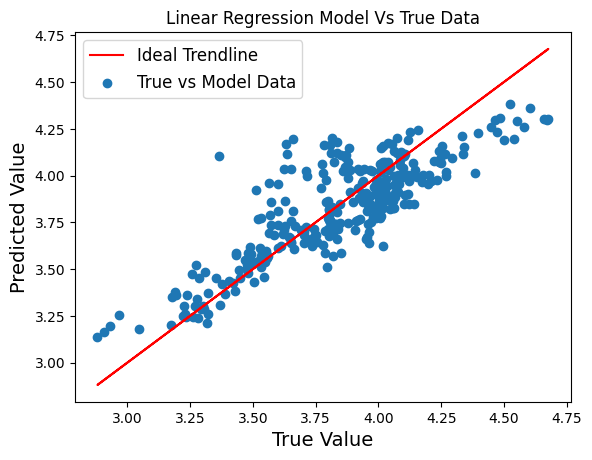

My_Model R2= 0.6776855561681037
r_adjusted = 0.7082526108944351


In [19]:
X = df4[['DEN']]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)
print(regression.coef_, regression.intercept_)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )
plt.plot(y_test,y_test, '-r')
plt.scatter(y_test, y_pred)

plt.title('Linear Regression Model Vs True Data')
plt.xlabel('True Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.legend(['Ideal Trendline', 'True vs Model Data'], loc='upper left', fontsize=12)
plt.show()

Co_true = np.array(0.77*y_test**2.93)
Co_my_model = 0.77*y_pred**2.93
Co_Castagna = np.array(0.77*(1.16*x_test + 1.36)**2.93)
print('My_Model R2=', r2_score(Co_true, Co_my_model))

n = len(y_pred)
p = 3
print('r_adjusted =', r2_adj(n,p))  

#### NEU

[-5.02575571] 4.898660031851457
Mean Squared Error: 0.02614310517152925
Root Mean Squared Error: 0.16168829633442627
R-Square: 0.7593794458827097


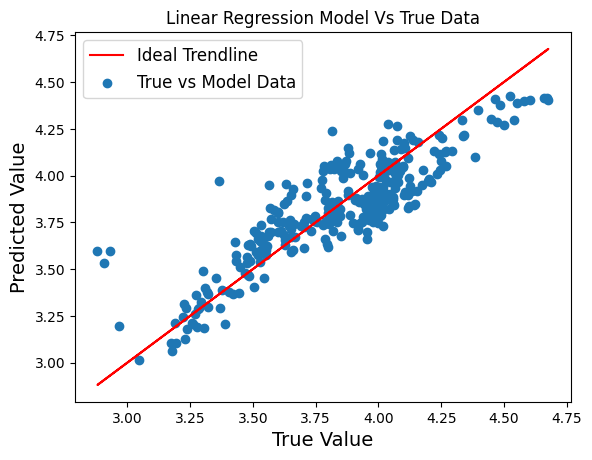

My_Model R2= 0.7566502567199422
r_adjusted = 0.7570049009407628


In [20]:
X = df4[['NEU']]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
regression = LinearRegression()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test)
print(regression.coef_, regression.intercept_)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:',rmse)
print('R-Square:',r2 )
plt.plot(y_test,y_test, '-r')
plt.scatter(y_test, y_pred)

plt.title('Linear Regression Model Vs True Data')
plt.xlabel('True Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.legend(['Ideal Trendline', 'True vs Model Data'], loc='upper left', fontsize=12)
plt.show()

Co_true = np.array(0.77*y_test**2.93)
Co_my_model = 0.77*y_pred**2.93
Co_Castagna = np.array(0.77*(1.16*x_test + 1.36)**2.93)
print('My_Model R2=', r2_score(Co_true, Co_my_model))

n = len(y_pred)
p = 3
print('r_adjusted =', r2_adj(n,p))  

### Multivariable regression

Model 1: Vp vs (Vs, DEN)
Mean Squared Error: 0.005993587451304042
Root Mean Squared Error: 0.07741826303466154
R-Square: 0.9624862692729851
Adjusted R-Square: 0.9622582222776841


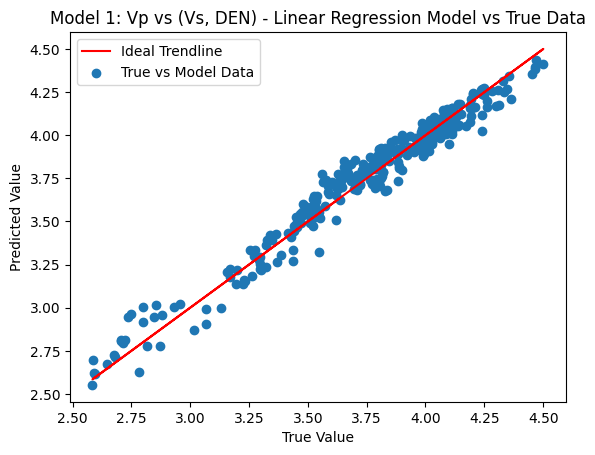



Model 2: Vp vs (Vs, NEU)
Mean Squared Error: 0.009007860624924683
Root Mean Squared Error: 0.0949097498939107
R-Square: 0.9436200004328988
Adjusted R-Square: 0.9432772648732204


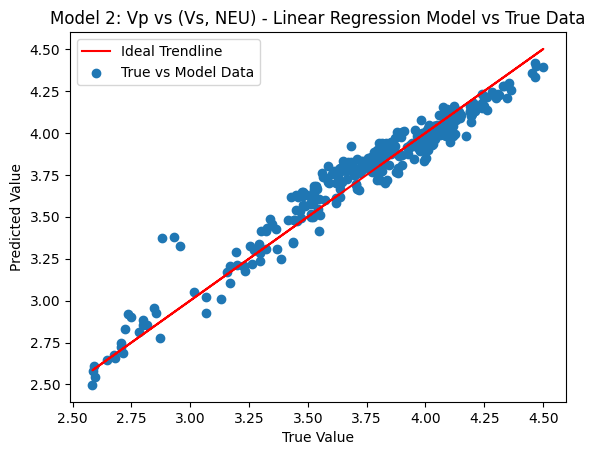



Model 3: Vp vs (DEN, NEU)
Mean Squared Error: 0.03754096055740825
Root Mean Squared Error: 0.19375489815075192
R-Square: 0.7650319617380918
Adjusted R-Square: 0.7636035846058006


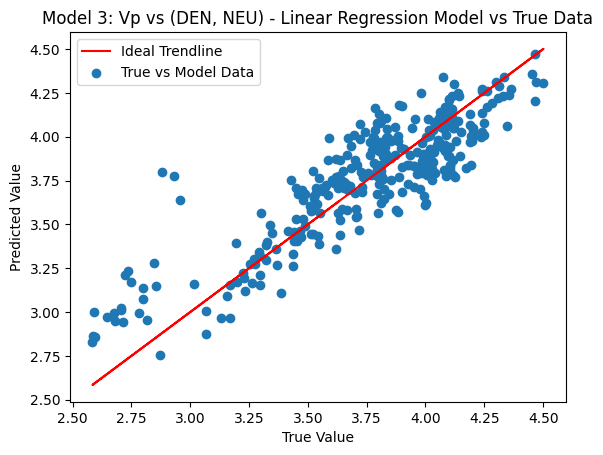



Model 4: Vp vs (Vs, DEN, NEU)
Mean Squared Error: 0.005855644545413353
Root Mean Squared Error: 0.07652218335498114
R-Square: 0.963349650856941
Adjusted R-Square: 0.9630144342489252


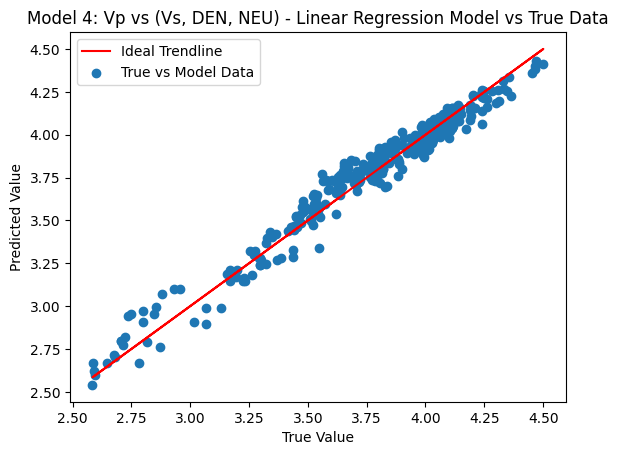

In [27]:
def multivariable_regression(X, y, title):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    regression = LinearRegression()
    
    regression.fit(X_train, y_train)
    
    y_pred = regression.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{title}")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-Square:", r2)
    
    n = len(y_test)
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print("Adjusted R-Square:", adjusted_r2)
    
    plt.figure()
    plt.plot(y_test, y_test, '-r')  # Ideal trend line
    plt.scatter(y_test, y_pred)
    plt.title(f'{title} - Linear Regression Model vs True Data')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.legend(['Ideal Trendline', 'True vs Model Data'])
    plt.show()
    print("\n")

y = df['Vp']

X = df[['Vs', 'DEN']]
multivariable_regression(X, y, "Model 1: Vp vs (Vs, DEN)")

X = df[['Vs', 'NEU']]
multivariable_regression(X, y, "Model 2: Vp vs (Vs, NEU)")

X = df[['DEN', 'NEU']]
multivariable_regression(X, y, "Model 3: Vp vs (DEN, NEU)")

X = df[['Vs', 'DEN', 'NEU']]
multivariable_regression(X, y, "Model 4: Vp vs (Vs, DEN, NEU)")


### Reflections

### Conclusion

### References